In [49]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [4]:
df = pd.read_csv('1- Student_Pass_or_Fail.csv')
df.head()

,Self_Study_Daily (Hours),Tution_Monthly (Hours),Pass_Or_Fail
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0


In [5]:
df.shape

(1000, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Self_Study_Daily (Hours)  1000 non-null   int64
 1   Tution_Monthly (Hours)    1000 non-null   int64
 2   Pass_Or_Fail              1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [7]:
df.apply(pd.isnull).sum()

Self_Study_Daily (Hours)    0
Tution_Monthly (Hours)      0
Pass_Or_Fail                0
dtype: int64

In [9]:
df['Pass_Or_Fail'].value_counts()

Pass_Or_Fail
0    501
1    499
Name: count, dtype: int64

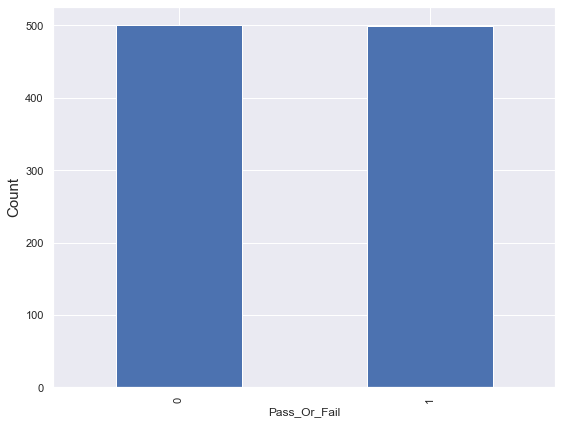

In [10]:
df['Pass_Or_Fail'].value_counts().plot(kind = 'bar', figsize = (9, 7))
plt.ylabel('Count', fontsize = 15)
plt.show()

In [11]:
df.describe()

,Self_Study_Daily (Hours),Tution_Monthly (Hours),Pass_Or_Fail
count,1000.000000,1000.000000,1000.000000
mean,5.744000,31.230000,0.499000
std,2.121076,5.976355,0.500249
min,0.000000,20.000000,0.000000
25%,4.000000,26.000000,0.000000
50%,6.000000,30.000000,0.000000
75%,7.000000,36.000000,1.000000
max,10.000000,50.000000,1.000000


In [12]:
df.groupby('Pass_Or_Fail').mean()

,Self_Study_Daily (Hours),Tution_Monthly (Hours)
Pass_Or_Fail,,
0,4.073852,35.834331
1,7.420842,26.607214


In [13]:
X = df.drop(columns = ['Pass_Or_Fail'], axis = 1)
y = df['Pass_Or_Fail']

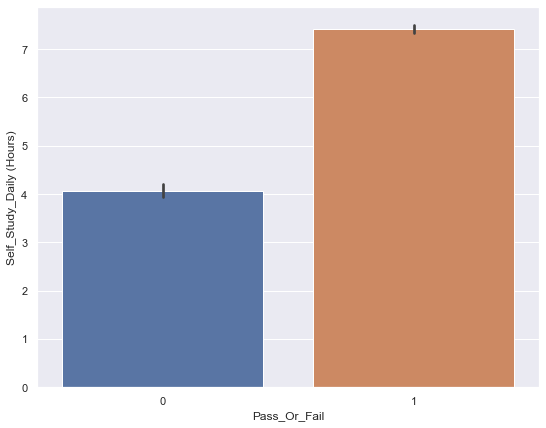

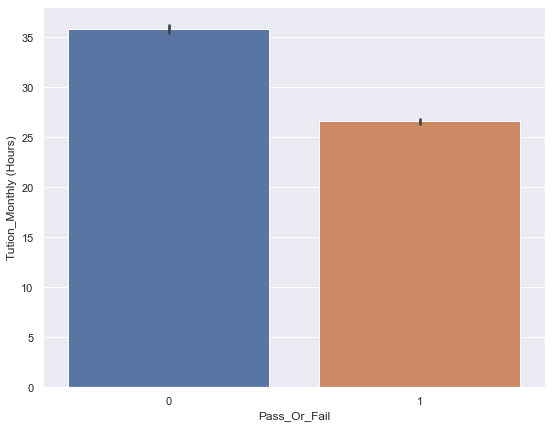

In [14]:
for column in X.columns:
    plt.figure(figsize = (9, 7))
    sns.barplot(data = df, x = y, y = column)
    plt.show()

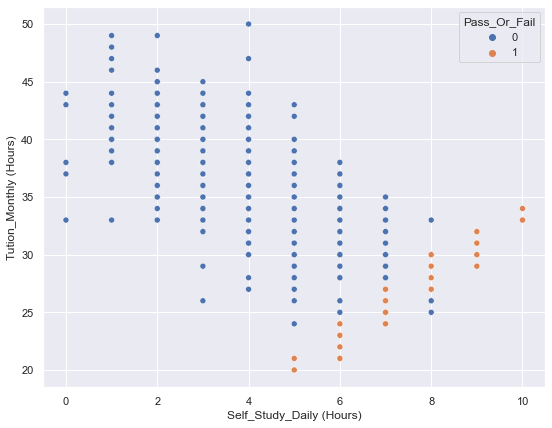

In [16]:
plt.figure(figsize = (9, 7))
sns.scatterplot(data = df, x = 'Self_Study_Daily (Hours)', y = 'Tution_Monthly (Hours)', hue = 'Pass_Or_Fail')
plt.show()

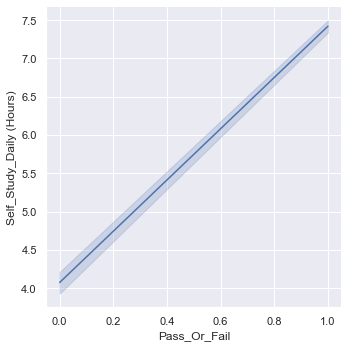

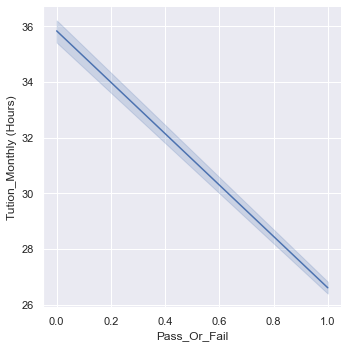

In [19]:
for column in X.columns:
    sns.relplot(data = df, x = y, y = column, kind = 'line')

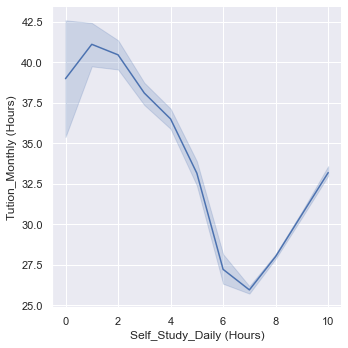

In [21]:
sns.relplot(data = df, x = 'Self_Study_Daily (Hours)', y = 'Tution_Monthly (Hours)', kind = 'line')

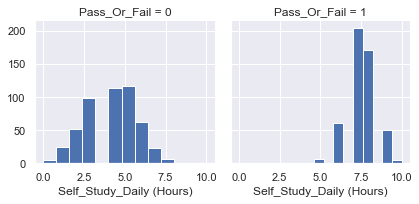

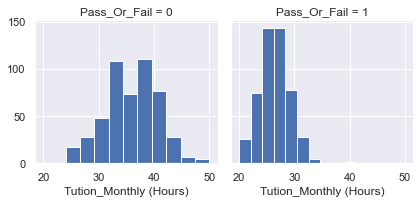

In [26]:
for column in X.columns:
    b = sns.FacetGrid(data = df, col = 'Pass_Or_Fail')
    b.map(plt.hist, column)
    plt.show()

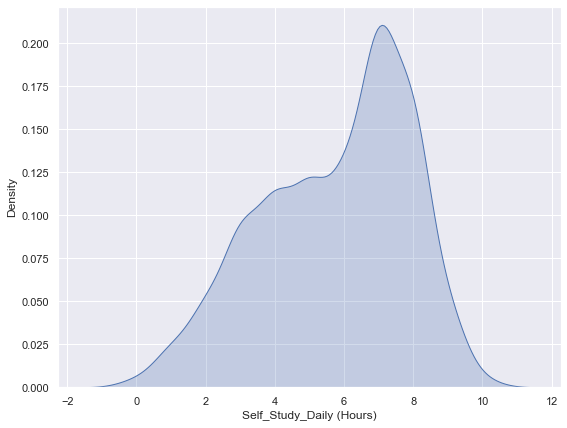

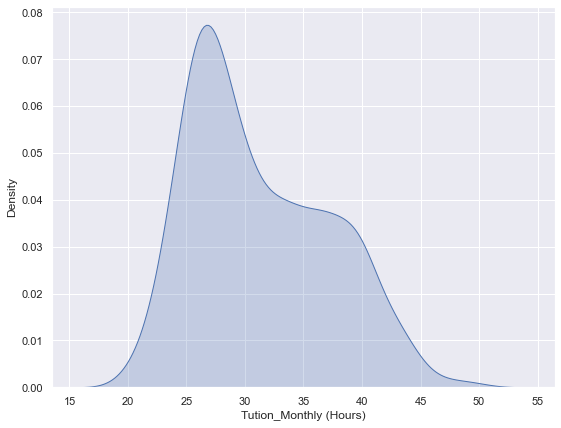

In [28]:
for column in X.columns:
    plt.figure(figsize = (9, 7))
    sns.kdeplot(X[column], shade = True, legend = False)
    plt.show()

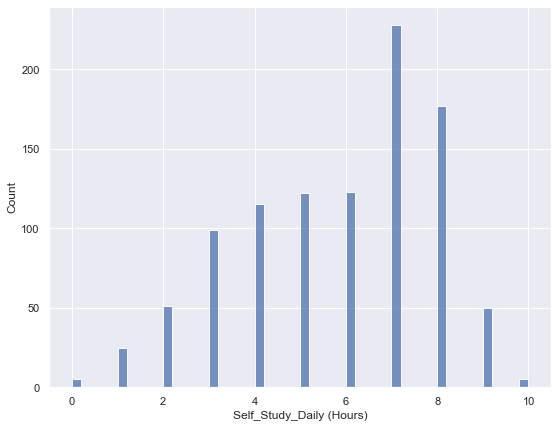

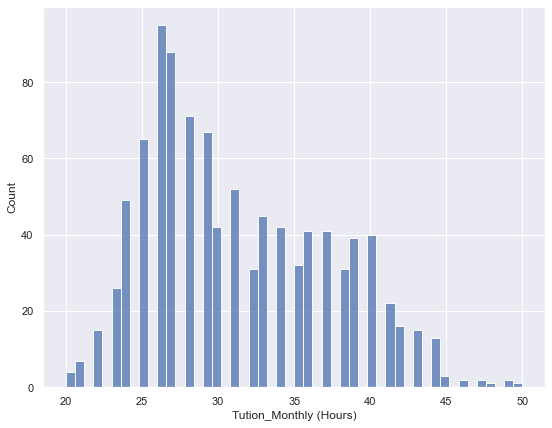

In [30]:
for column in X.columns:
    plt.figure(figsize = (9, 7))
    sns.histplot(X[column], bins = 50)
    plt.show()

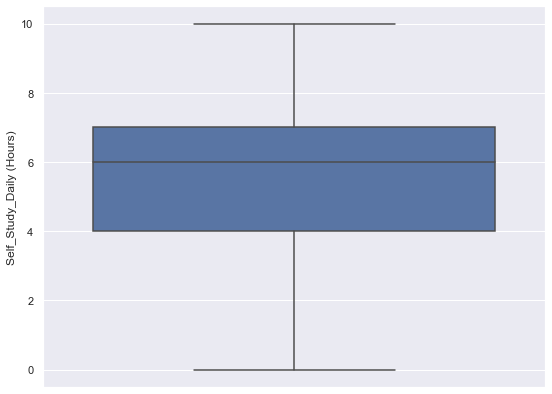

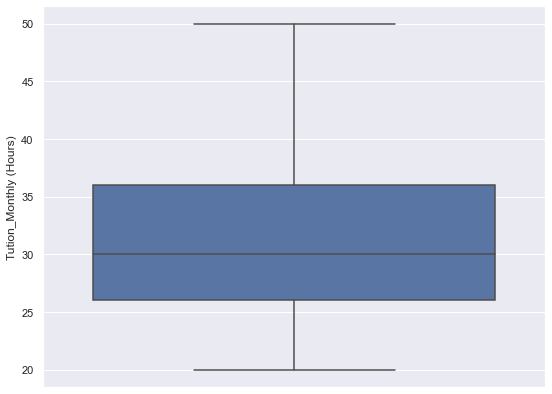

In [31]:
for column in X.columns:
    plt.figure(figsize = (9, 7))
    sns.boxplot(data = X, y = column)
    plt.show()

In [33]:
scaler = StandardScaler()

In [34]:
x1 = X[['Self_Study_Daily (Hours)']]
x1_scaled = scaler.fit_transform(x1)

In [35]:
x1_2 = sm.add_constant(x1_scaled)
model1 = sm.Logit(y, x1_2).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.219416
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Pass_Or_Fail   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Thu, 26 Sep 2024   Pseudo R-squ.:                  0.6834
Time:                        07:21:05   Log-Likelihood:                -219.42
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                4.734e-208
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7538      0.145     -5.209      0.000      -1.037      -0.470
x1             4.7563      0.323     14.739      0.000       4.124       5.389
==============================================================================
"""

In [36]:
x2 = X[['Tution_Monthly (Hours)']]
x2_scaled = scaler.fit_transform(x2)

In [38]:
x2_2 = sm.add_constant(x2_scaled)
model2 = sm.Logit(y, x2_2).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.255822
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Pass_Or_Fail   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Thu, 26 Sep 2024   Pseudo R-squ.:                  0.6309
Time:                        07:23:15   Log-Likelihood:                -255.82
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                3.187e-192
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6798      0.133     -5.101      0.000      -0.941      -0.419
x1            -4.1026      0.269    -15.259      0.000      -4.630      -3.576
==============================================================================
"""

In [39]:
x3 = sm.add_constant(X)
model3 = sm.Logit(y, x3).fit()
model3.summary()

Optimization terminated successfully.
         Current function value: 0.095786
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Pass_Or_Fail   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Thu, 26 Sep 2024   Pseudo R-squ.:                  0.8618
Time:                        07:24:41   Log-Likelihood:                -95.786
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                3.716e-260
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        7.1956      2.223      3.237      0.001       2.839      11.552
Self_Study_Daily (Hours)     2.7666      0.317      8.716      0.000       2.144       3.389
Tution_Monthly (Hours)      -0.9110      0.113     -8.086      0.000      -1.132      -0.690
============================================================================================

Possibly complete quasi-separation: A fraction 0.36 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [40]:
x_scaled = scaler.fit_transform(X)
x_t = sm.add_constant(x_scaled)
model4 = sm.Logit(y, x_t).fit()
model4.summary()

Optimization terminated successfully.
         Current function value: 0.095786
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Pass_Or_Fail   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Thu, 26 Sep 2024   Pseudo R-squ.:                  0.8618
Time:                        07:37:44   Log-Likelihood:                -95.786
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                3.716e-260
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3642      0.839     -6.393      0.000      -7.009      -3.720
x1             5.8653      0.673      8.716      0.000       4.546       7.184
x2            -5.4419      0.673     -8.086      0.000      -6.761      -4.123
==============================================================================

Possibly complete quasi-separation: A fraction 0.36 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 101, stratify = y,
                                                   shuffle = True)

In [44]:
X_train.shape

(800, 2)

In [45]:
X_test.shape

(200, 2)

In [46]:
y_train.value_counts()

Pass_Or_Fail
0    401
1    399
Name: count, dtype: int64

In [47]:
y_test.value_counts()

Pass_Or_Fail
1    100
0    100
Name: count, dtype: int64

In [48]:
model5 = LogisticRegression()

In [50]:
cvs = cross_val_score(model5, X_train, y_train, cv = 5)
print('Validation accuracy for Logistic Regression model is:', round(cvs.mean(), 2))

Validation accuracy for Logistic Regression model is: 0.97


In [52]:
model5.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred = model5.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       100
           1       0.95      0.99      0.97       100

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



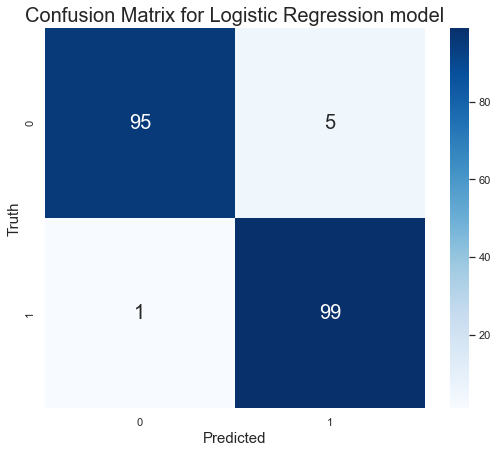

In [55]:
plt.figure(figsize = (9, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, square = True, cbar = True, annot_kws = {'size' : 20}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion Matrix for Logistic Regression model', fontsize = 20)
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Truth', fontsize = 15)
plt.show()